# Mini Projeto para Avaliação em Processo Seletivo 
# Delivery Center
##### Autora: Raissa da Silva de Menezes Korehisa
##### Cargo Pretendido: Analista de Dados Junior (Remoto) 

In [2]:
#Permitindo a utilização de dados do google drive
#from google.colab import drive
#drive.mount('/content/drive/', force_remount=True)


In [81]:
# Importações de bibliotecas

# Manipulação e visualização de dados:

import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as m
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

In [4]:
#Para utilização no Google Colab
#from google.colab import drive
#drive.mount('/content/drive')
#mount_dir = 'drive/MyDrive/datalab-work-at-deliverycenter'

### Carga de  dados

In [5]:
#Carregando os datasets:
df_channels = pd.read_csv("datasets/channels.csv")
df_deliveries = pd.read_csv("datasets/deliveries.csv")
df_drivers = pd.read_csv("datasets/drivers.csv")
df_hubs = pd.read_csv("datasets/hubs.csv", encoding = "ISO-8859-1", engine='python')
df_orders = pd.read_csv("datasets/orders.csv")
df_payments = pd.read_csv("datasets/payments.csv")
df_stores = pd.read_csv("datasets/stores.csv", encoding = "ISO-8859-1", engine='python')

## Análise Descritiva 
Nesta seção os Data Frames serão visualizados e serão feitas algumas análises para compreensão dos dados, contextualização hipóteses ou subsidio na criação de KPIs.

#### **Channels**

In [6]:
#Visualizando dados 
df_channels.head()

,channel_id,channel_name,channel_type
0,1,OTHER PLACE,OWN CHANNEL
1,2,PHONE PLACE,OWN CHANNEL
2,3,WHATS PLACE,OWN CHANNEL
3,4,FACE PLACE,OWN CHANNEL
4,5,FOOD PLACE,MARKETPLACE


In [7]:
#Verificanco valores únicos 
df_channels.nunique()

channel_id      40
channel_name    40
channel_type     2
dtype: int64

<AxesSubplot:ylabel='channel_type'>

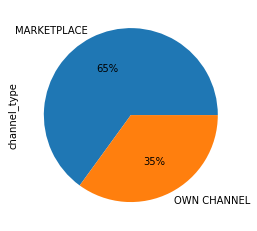

In [8]:
# Distribuição dos canais por tipo
df_channels['channel_type'].value_counts().plot.pie(autopct='%1.0f%%')

#### **Deliveries**

In [9]:
#Pré-análise de entregas
#Viausalizando dados
df_deliveries.head()

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
0,2174658,68413340,8378.0,5199.0,DELIVERED
1,2174660,68414309,2473.0,410.0,DELIVERED
2,2174661,68416230,7615.0,3784.0,DELIVERED
3,2174663,68412721,8378.0,5714.0,DELIVERED
4,2174675,68414018,10463.0,3746.0,DELIVERED


In [10]:
#Verificanco valores únicos 
df_deliveries.nunique()

delivery_id                 378843
delivery_order_id           358654
driver_id                     4583
delivery_distance_meters     16477
delivery_status                  3
dtype: int64

In [11]:
#Resumo estatístico das colunas numéricas
df_deliveries.describe()

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters
count,3.788430e+05,3.788430e+05,362957.000000,3.787700e+05
mean,2.634216e+06,8.220422e+07,21001.777643,1.072136e+04
std,2.646553e+05,6.996909e+06,15520.652243,2.315392e+05
min,2.174658e+06,6.840903e+07,133.000000,0.000000e+00
25%,2.405588e+06,7.631298e+07,7615.000000,1.184000e+03
50%,2.637111e+06,8.308321e+07,18754.000000,2.073000e+03
75%,2.860334e+06,8.787972e+07,31050.000000,3.507000e+03
max,3.144739e+06,9.313982e+07,66459.000000,7.251291e+06


In [12]:
#Calculando em km a distancia percorrida em pedidos enviados
distancia = df_deliveries.loc[df_deliveries["delivery_status"] == 'DELIVERED', 'delivery_distance_meters']
distancia.sum()/1000




3630995.822

#### **Hubs**

In [13]:
#Pré-análise de Hubs
#Viausalizando dados
df_hubs.head()

,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,2,BLUE SHOPPING,PORTO ALEGRE,RS,-30.047415,-51.213510
1,3,GREEN SHOPPING,PORTO ALEGRE,RS,-30.037415,-51.203520
2,4,RED SHOPPING,PORTO ALEGRE,RS,-30.021948,-51.208382
3,5,FUNK SHOPPING,RIO DE JANEIRO,RJ,-23.000750,-43.318282
4,8,GOLDEN SHOPPING,RIO DE JANEIRO,RJ,-22.921475,-43.234774


<AxesSubplot:>

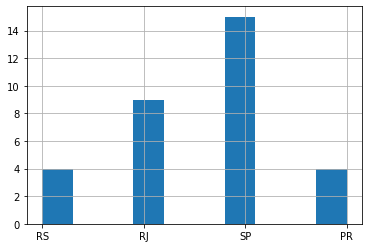

In [14]:
#Histograma dos estados com maior número de hubs
df_hubs['hub_state'].hist()

#### **Orders**



In [15]:
#Pré-análise de Pedidos
#Viausalizando dados
df_orders.head()

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
0,68405119,3512,5,68405119,68405119,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68405123,3512,5,68405123,68405123,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68405206,3512,5,68405206,68405206,CANCELED,115.5,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68405465,3401,5,68405465,68405465,CANCELED,55.9,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68406064,3401,5,68406064,68406064,CANCELED,37.9,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Quantificando dados únicos
df_orders.nunique()


order_id                             368999
store_id                                951
channel_id                               39
payment_order_id                     368999
delivery_order_id                    368999
order_status                              2
order_amount                          17444
order_delivery_fee                      520
order_delivery_cost                    3155
order_created_hour                       24
order_created_minute                     60
order_created_day                        31
order_created_month                       4
order_created_year                        1
order_moment_created                 340934
order_moment_accepted                343900
order_moment_ready                   328458
order_moment_collected               313259
order_moment_in_expedition           290327
order_moment_delivering              328727
order_moment_delivered                19523
order_moment_finished                336815
order_metric_collected_time     

In [17]:
#Resumo estatístico dos pedidos com status Finalizado
pedidos_finalizados = df_orders.loc[df_orders['order_status'] == 'FINISHED' ]
pedidos_finalizados.describe()

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
count,3.520200e+05,352020.000000,352020.000000,3.520200e+05,3.520200e+05,352020.000000,352020.000000,346020.000000,352020.000000,352020.000000,352020.000000,352020.000000,352020.0,315788.000000,296489.000000,340976.000000,293349.000000,333172.000000,342182.000000,351657.000000
mean,8.229440e+07,1182.129905,7.659536,8.229440e+07,8.229440e+07,100.259162,6.215922,7.580586,16.758741,29.423496,15.983106,2.687981,2021.0,2.751844,9.177341,61.712289,4.760959,19.092145,46.518219,155.843596
std,7.034817e+06,1137.413675,8.184526,7.034817e+06,7.034817e+06,233.536942,6.230836,3.792957,6.069445,17.218225,8.818673,1.099862,0.0,13.245979,65.777678,802.903520,16.902299,88.354148,752.684618,1225.229132
min,6.841006e+07,6.000000,1.000000,6.841006e+07,6.841006e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2021.0,-1.470000,-2728.350000,0.000000,-1.420000,-0.820000,-4.100000,0.370000
25%,7.634870e+07,415.000000,5.000000,7.634870e+07,7.634870e+07,39.900000,0.000000,5.550000,15.000000,15.000000,8.000000,2.000000,2021.0,0.780000,1.170000,9.000000,2.150000,4.480000,11.830000,32.870000
50%,8.324197e+07,707.000000,5.000000,8.324197e+07,8.324197e+07,71.900000,6.900000,7.390000,17.000000,29.000000,16.000000,3.000000,2021.0,1.670000,2.500000,15.200000,3.570000,6.600000,16.700000,42.180000
75%,8.802002e+07,1454.000000,5.000000,8.802002e+07,8.802002e+07,122.350000,11.900000,8.800000,22.000000,44.000000,24.000000,4.000000,2021.0,3.030000,5.350000,22.230000,5.430000,10.330000,24.670000,55.550000
max,9.313982e+07,4679.000000,49.000000,9.313982e+07,9.313982e+07,100000.110000,990.110000,156.000000,23.000000,59.000000,31.000000,4.000000,2021.0,2050.400000,11712.280000,85662.030000,2735.520000,11718.200000,154261.100000,154277.320000


<AxesSubplot:ylabel='order_status'>

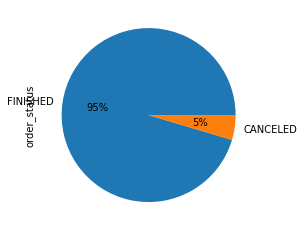

In [18]:
#Representação gráfica dos pedidos Finalizados x Cancelados
df_orders['order_status'].value_counts().plot.pie(autopct='%1.0f%%')

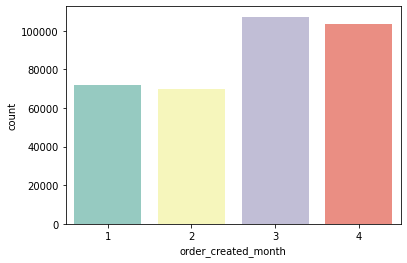

In [19]:
#identificando os meses com maior quantidade de pedidos finalizados
ax = sns.countplot(x=pedidos_finalizados['order_created_month'], data=pedidos_finalizados, palette="Set3")

#### **Payments**

In [20]:
#Pré-análise de Pagamentso
#Viausalizando dados
df_payments.head()

,payment_id,payment_order_id,payment_amount,payment_fee,payment_method,payment_status
0,4427917,68410055,118.44,0.00,VOUCHER,PAID
1,4427918,68410055,394.81,7.90,ONLINE,PAID
2,4427941,68412721,206.95,5.59,ONLINE,PAID
3,4427948,68413340,58.80,1.59,ONLINE,PAID
4,4427955,68414018,45.80,0.92,ONLINE,PAID


In [21]:
#Contagem dos pagamentos agrupados por método
metodos_pagamento = df_payments['payment_method'].value_counts()
metodos_pagamento

ONLINE                      312377
VOUCHER                      48570
DEBIT                        12347
MEAL_BENEFIT                  6687
STORE_DIRECT_PAYMENT          6574
CREDIT                        4966
DEBIT_STORE                   1997
VOUCHER_STORE                 1683
PAYMENT_LINK                  1613
CREDIT_STORE                  1266
MONEY                         1190
VOUCHER_DC                     465
INSTALLMENT_CREDIT_STORE       452
VOUCHER_OL                     347
BANK_TRANSFER_DC               300
Name: payment_method, dtype: int64

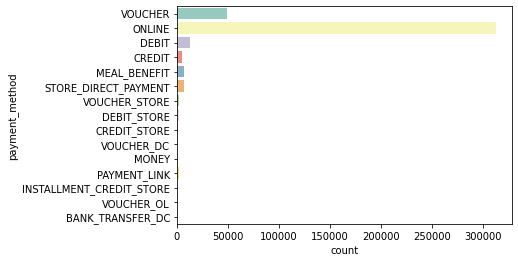

In [22]:
#Representação visual dos métodos de pagamento utilizados
ax = sns.countplot(y="payment_method", data=df_payments, palette="Set3")

#### **Stores**

In [23]:
#Pré-análise de Lojas
#Viausalizando dados
df_stores.head()

,store_id,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude
0,3,2,CUMIURI,FOOD,0.0,NaN,NaN
1,6,3,PIMGUCIS DA VIVA,FOOD,0.0,-30.037415,-51.203520
2,8,3,RASMUR S,FOOD,0.0,-30.037415,-51.203520
3,53,8,PAPA SUCIS,FOOD,0.0,-22.921475,-43.234822
4,54,8,VUZPI PAZZIS,FOOD,0.0,-22.921475,-43.234822


<AxesSubplot:ylabel='store_segment'>

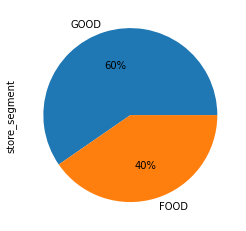

In [24]:
#Representação gráfica da distribuição das lojas por segmento
df_stores['store_segment'].value_counts().plot.pie(autopct='%1.0f%%')

## Conclusões via análise descritiva:
- Channels: 
    - A maioria dos canais disponíveis são via MarketPalce, correnpondendo  65%.
- Deliveries: 
    - No período estudado, foram percorridos mais de 4 milhões de km em entregas, que correpondem a aproximadamente 90 voltas no planeta Terra.
- Hubs:
    - O estado com maior número de hubs é São Paulo, seguido pelo Rio de Janeiro.
- Orders: 
    - O dataset se refere ao período entre 01/01/2021 até 31/04/2021
    - O tempo médio de trânsito é de 46 minutos
    - O valor médio dos pedidos é de R\$ 100,25
    - 95% dos pedidos chegam ao status Finalizado
    - Os meses 3 e 4 tiveram maior quantidade de pedidos finalizados
- Payments:
    - O método de pagamento mais utilizado é Online, seguido por Voucher e Débito
- Stores:
    - 60% das lojas fazem parte do segmento de 'Good',  e 40% do segmento 'Food'